In [11]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

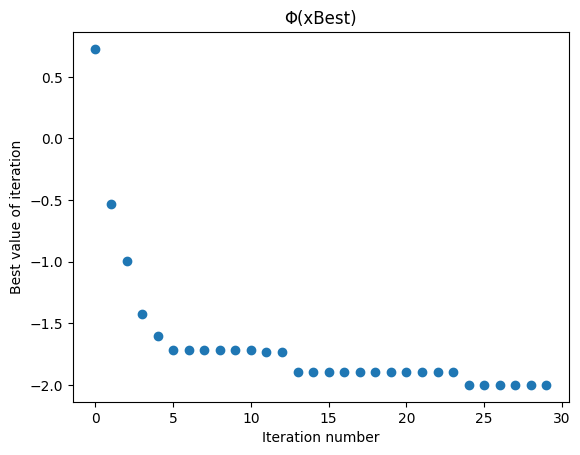

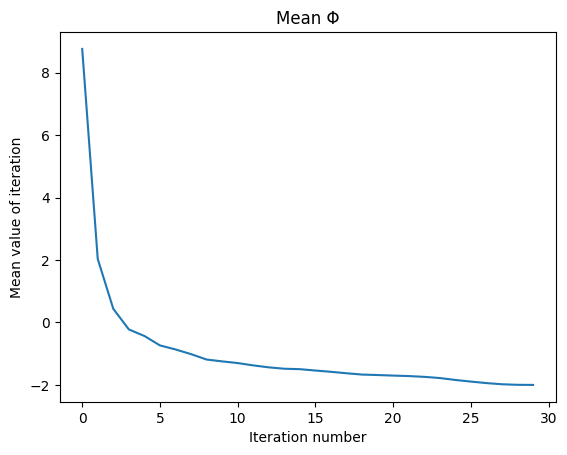

best fitness: -1.9999982174394317, best solution: [-7.753067117106797e-05, -7.01779955176935e-05]


In [64]:
def sphere(x):
    y = 0
    # Sphere function
    # x ∈ <-∞,∞> 
    for i in range(len(x)):
        y += x[i] ** 2
    return y

def Rastrigin(x):
    y = 0
    # Rastrigin function
    # x ∈ <-1,1>
    # fmin(0,0,...,0)=-n
    for i in range(len(x)):
        y+=x[i]**2-math.cos(18*x[i])
    return y
def Ackley(x):
    y=0
    # Ackley function
    # x ∈ <-5,5> 
    # fmin(0,0,...,0)=0
    
    sum=0
    for i in range(len(x)):
        sum+=math.cos(2*math.pi*x[i])

    y+=-20*math.exp(-0.2*math.sqrt((1/len(x))*(np.sum(np.square(x)))))-math.exp((1/len(x))*sum)+math.e+20
    return y
def Rosenbrock(x):
    y = 0
    # Rosenbrock function   
    # x ∈ <-∞,∞> 
    # fmin(1,1,...,1)=0
    for i in range(len(x)-1):
        y+=(1-x[i])**2 + 100*(x[i+1]-x[i]**2)**2
    return y

test_function_dict = {'sphere': lambda x: sphere(x), 'Rastrigin': lambda x: Rastrigin(x), 'Ackley': lambda x: Ackley(x), 'Rosenbrock': lambda x: Rosenbrock(x)}


def boundary_check(x, lower_bound, upper_bound, dim):
    for i in range(dim):
        if x[i] < lower_bound:
            x[i] = lower_bound
        elif x[i] > upper_bound:
            x[i] = upper_bound
    return x


def main(initial_population_size, max_population_size, iter, min_seeds, max_seeds, initial_sigma, final_sigma, lower_bound, upper_bound,dim, f_name):
    """
    initial_population_size - initial population size
    max_population_size - maximum population size
    iter - maximum number of iterations
    min_seeds - minimum number of seeds
    max_seeds - maximum number of seeds
    initial_sigma - initial value of standard deviation
    final_sigma - final value of standard deviation
    lower_bound - lower bound 
    upper_bound - upper bound 
    dim - dimension of seed
    f_name - name of test function
    """
    # Initialization
    pos = []  # the position of weeds
    score = []  # the score of weeds
    mean_values=[] # the mean values of iterations

    # initialize offspring population
    for _ in range(initial_population_size):
        pos.append([random.uniform(lower_bound, upper_bound) for i in range(dim)]) 
        score.append(test_function_dict[f_name](pos[-1]))

    gbest = min(score)  # the global best
    gbest_pos = pos[score.index(gbest)].copy()  # the global best individual
    iter_best = []  # the global best of each iteration
    iter_best_pos = [] # the global best position of each iteration

    # The main loop
    for t in range(iter):

        # Update standard deviation
        sigma = ((iter-t)/(iter))**2*(initial_sigma - final_sigma) + final_sigma

        # Reproduction and spatial dispersion
        new_pos = []
        new_score = []
        min_score = min(score)
        max_score = max(score)

        if min_score == 0 and max_score == 0:
            break

        for i in range(len(pos)):
            ratio = (score[i] - max_score) / (min_score - max_score)
            snum = math.floor(min_seeds + (max_seeds - min_seeds) * ratio)  # the number of seeds

            for _ in range(snum):
                temp_pos = [pos[i][j] + random.gauss(0, sigma) for j in range(dim)]
                temp_pos = boundary_check(temp_pos, lower_bound, upper_bound, dim)
                new_pos.append(temp_pos)
                new_score.append(test_function_dict[f_name](temp_pos))

        # Competitive exclusion
        new_pos.extend(pos)
        new_score.extend(score)

        if len(new_pos) > max_population_size:
            pos = []
            score = []
            sorted_index = np.argsort(new_score)
            for i in range(max_population_size):
                pos.append(new_pos[sorted_index[i]])
                score.append(new_score[sorted_index[i]])
        else:
            pos = new_pos
            score = new_score

        # Update the global best
        if min(score) < gbest:
            gbest = min(score)
            gbest_pos = pos[score.index(gbest)]
           
        iter_best.append(gbest)
        iter_best_pos.append(gbest_pos)
        mean_values.append(sum(score)/len(score))

    # Results
    # best value of iteration
    x = [i for i in range(len(iter_best))]
    plt.figure()
    plt.scatter(x, iter_best)
    plt.xlabel('Iteration number')
    plt.ylabel('Best value of iteration')
    plt.title('Φ(xBest)')
    #plt.xticks(x)
    plt.show()

    # mean value of iteration
    plt.figure()
    plt.plot(x, mean_values)
    plt.xlabel('Iteration number')
    plt.ylabel('Mean value of iteration')
    plt.title('Mean Φ')
    #plt.xticks(x)
    plt.show()
   
    #return {'best fitness': gbest, 'best solution': gbest_pos, 'best iter solution': iter_best_pos}
    return [gbest, gbest_pos, iter_best_pos,lower_bound,upper_bound, f_name]

x,y,z,lower,upper, test_function_name=main(10,30,30,0,5,1,1e-6,-5,5,2,'Rastrigin')

print("best fitness: {}, best solution: {}".format(x,y))


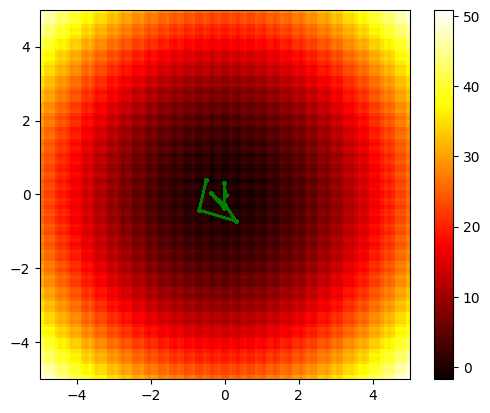

In [65]:
#%matplotlib inline

def sphere2(x, y):
    # Sphere function for two variables
    return x**2+y**2

def Rastrigin2(x,y):
    # Rastrigin function for two variables
    return x**2-np.cos(18*x)+y**2-np.cos(18*y)

def Ackley2(x, y):
    # Ackley function for two variables
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt((x ** 2 + y ** 2) / 2))
    term2 = -np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return term1 + term2 + a + np.exp(1)

def Rosenbrock2(x,y):
    # Rosenbrock function for two variables
    return (1-x)**2 + 100*(y-x**2)**2+(1-x)**2 + 100*(y-x**2)**2

test_function_dict2 = {'sphere': lambda x, y: sphere2(x,y), 'Rastrigin': lambda x, y: Rastrigin2(x,y), 'Ackley': lambda x,y: Ackley2(x,y), 'Rosenbrock': lambda x,y: Rosenbrock2(x,y)}



# Generate the data
x = np.linspace(lower, upper, 100)
y = np.linspace(lower, upper, 100)
X, Y = np.meshgrid(x, y)
Z = test_function_dict2[test_function_name](X, Y)

# Initialize the plot
fig, ax = plt.subplots()
plot = ax.imshow(Z, cmap='hot', origin='lower', extent=[lower, upper, lower, upper])
plt.colorbar(plot)

# Function called for each animation frame
def update(frame):
    X = z[:frame+1]
    ax.plot(*zip(*X), color='green', marker='o', markersize=2)
  

# Create the animation
animation = FuncAnimation(fig, update, frames=len(z), interval=100)


HTML(animation.to_jshtml())